In [8]:
# Importing packagies 
import tensorflow as tf
import cv2
import imghdr
import os
import matplotlib.pyplot as plt 


In [9]:
data_dir = 'C:/Users/Home/OneDrive/Desktop/Tech/CXR_Project'# name of image folder on my computer 
img_ex = ['jpeg', 'jpg', 'bmp', 'png'] # type of image extensions to consider 
for img_class in os.listdir(data_dir): 
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_ex:
                print(f'Not here {img_path}')
                os.remove(img_path)
        except Exception as e: 
            print(f'img issues {img_path}')

In [10]:
# Labeling, suffling and storing data into memory using tf.keras.utils 

import numpy as np
import matplotlib.pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('C:/Users/Home/OneDrive/Desktop/Tech/CXR_Project')# Total of 5480 images with 2 classes 
data_itera = data.as_numpy_iterator()
batch = data_itera.next() # each batch contains 32 images  
np.shape(batch[0])# matrix of each images 
#batch[1][:4]# label of each images  
      

Found 689 files belonging to 2 classes.


(32, 256, 256, 3)

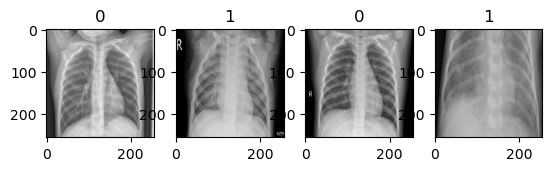

In [11]:
# Plotting the first four images with it's label

fig, ax = plt.subplots(ncols = 4)
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int)) # 0 = normal, 1 = pneumonia
    ax[idx].title.set_text(batch[1][idx])

In [12]:
# Preprocessing 

In [13]:
data = data.map(lambda x, y: (x/255, y))
scaled_itera = data.as_numpy_iterator()
scaled_batch = scaled_itera.next()
scaled_batch[1]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
# Deep learning 

#import and initiate modules needed for classification

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()


In [16]:
##Additing layers of network 
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



In [17]:
# Compile my model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
#Summary of model generated 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [19]:
logdir ='logs'
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [20]:
# 30 iterations 
hist = model.fit(train, epochs=12, validation_data=val, callbacks = [tensorboard])

Epoch 1/12
15/15 [==============================] - 15s 849ms/step - loss: 0.8858 - accuracy: 0.5917 - val_loss: 0.6750 - val_accuracy: 0.8672
Epoch 2/12
15/15 [==============================] - 14s 851ms/step - loss: 0.6514 - accuracy: 0.6458 - val_loss: 0.5656 - val_accuracy: 0.8125
Epoch 3/12
15/15 [==============================] - 14s 865ms/step - loss: 0.4219 - accuracy: 0.8479 - val_loss: 0.3513 - val_accuracy: 0.8750
Epoch 4/12
15/15 [==============================] - 14s 877ms/step - loss: 0.2900 - accuracy: 0.8854 - val_loss: 0.2777 - val_accuracy: 0.9141
Epoch 5/12
15/15 [==============================] - 14s 893ms/step - loss: 0.2230 - accuracy: 0.9146 - val_loss: 0.2522 - val_accuracy: 0.8984
Epoch 6/12
15/15 [==============================] - 14s 870ms/step - loss: 0.1856 - accuracy: 0.9250 - val_loss: 0.2094 - val_accuracy: 0.9141
Epoch 7/12
15/15 [==============================] - 14s 878ms/step - loss: 0.1444 - accuracy: 0.9417 - val_loss: 0.2051 - val_accuracy: 0.9297

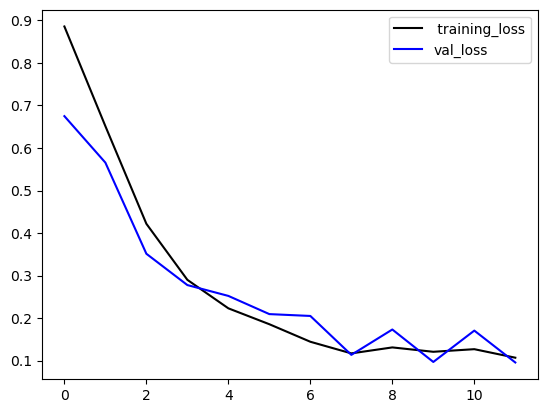

In [21]:
# plotting training_loss, val_loss
plt.plot(hist.history['loss'], color = 'black', label = ' training_loss')
plt.plot(hist.history['val_loss'], color = 'blue', label = 'val_loss')
plt.legend()

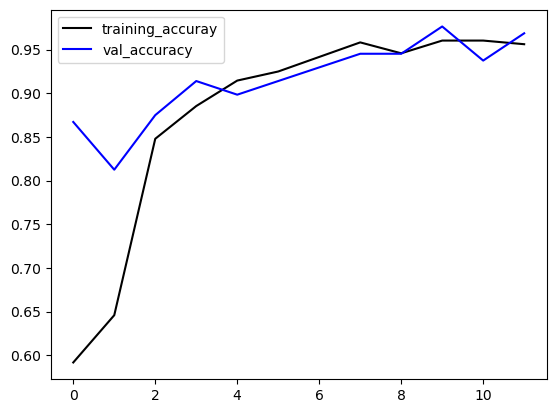

In [22]:
# plotting training_accuracy, val_accuracy
plt.plot(hist.history['accuracy'], color = 'black', label = 'training_accuray')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.legend()

In [23]:
#Parameters to evaluate test data
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

1/1 [==============================] - 0s 128ms/step
Pneumonia
[[0.7404121]]


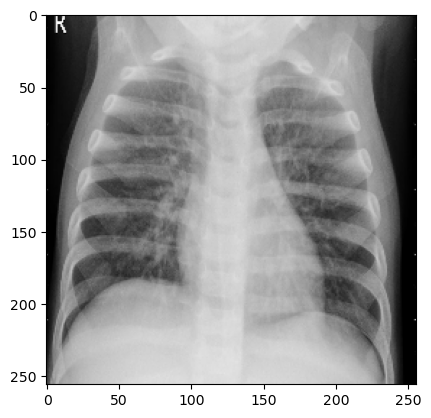

In [24]:
ims = 'C:/Users/Home/OneDrive/Desktop/Tech/CXR_Project/pneumonia/person22_virus_55.jpeg'
imgr = cv2.imread(ims)
size = tf.image.resize(imgr, (256,256))
plt.imshow(size.numpy().astype(int))# printing new image 

new_predu = model.predict(np.expand_dims(size/255, 0))

if new_predu < 0.5:
    print('Normal' )
else:
    print('Pneumonia')
print(new_predu)

1/1 [==============================] - 0s 29ms/step
Normal
[[0.00075939]]


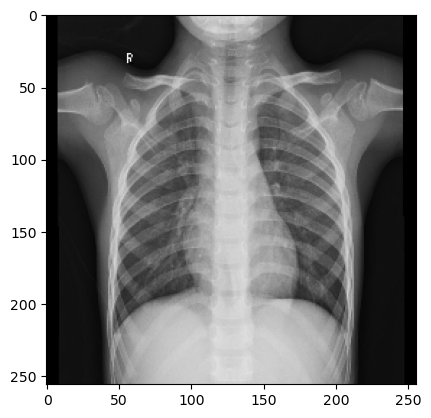

In [25]:
ims = 'C:/Users/Home/OneDrive/Desktop/Normal/NORMAL2-IM-0051-0001.jpeg'
imgr = cv2.imread(ims)
size = tf.image.resize(imgr, (256,256))
plt.imshow(size.numpy().astype(int))# printing new image 

new_predu = model.predict(np.expand_dims(size/255, 0))

if new_predu < 0.5:
    print('Normal' )
else:
    print('Pneumonia')
print(new_predu)

In [26]:
#from tensorflow.keras.models import load_model

#model.save(os.path.join('./savedmode', 'CXR_project.h5'))